In [0]:
# Loading the dataset for telemetry
telemetry = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/telemetry.csv')

# Loading the dataset for error
error = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/errors.csv')

# Loading the dataset for maintenance
maintenance = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/maint.csv')

# Loading the dataset for machines
machines = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/machines.csv')

# Loading the dataset for failures
failures = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/failures.csv')

In [0]:
# Importing all necessary libraries
import datetime
from pyspark.sql.functions import to_date

import pyspark.sql.functions as F
from pyspark.sql.functions import col, unix_timestamp, round
from pyspark.sql.functions import datediff
from pyspark.sql.window import Window
from pyspark.sql.types import DoubleType

from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

from pyspark.sql import SparkSession

# for creating pipelines and model
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorIndexer
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

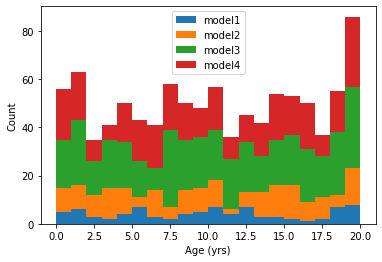

In [0]:
# visulaizing the machine dataset

machines = machines.toPandas()

fig, ax = plt.subplots()

_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, 
                      label=['model1', 'model2', 'model3', 'model4'])

plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()
display(fig)

In [0]:
# displaying the errorID count
error.select("errorID").display()

errorID
error3
error4
error1
error2
error1
error5
error4
error2
error3
error5


In [0]:
# displaying the comp count from maintenance dataset
maintenance.select("comp").display()

comp
comp4
comp1
comp2
comp3
comp1
comp1
comp3
comp3
comp3
comp1


In [0]:
# displaying the rotate against machineID
telemetry.select("datetime","rotate").display()

datetime,rotate
2015-01-01 06:00:00,530.813577555042
2015-01-01 07:00:00,535.523532319384
2015-01-01 08:00:00,456.080746005808
2015-01-01 09:00:00,503.469990485512
2015-01-01 10:00:00,371.600611295334
2015-01-01 11:00:00,530.857266087542
2015-01-01 12:00:00,450.2275288129
2015-01-01 13:00:00,486.466837788584
2015-01-01 14:00:00,488.968697483274
2015-01-01 15:00:00,508.202759433056


In [0]:
telemetry.select("datetime","pressure").display()

datetime,pressure
2015-01-01 06:00:00,101.788175260076
2015-01-01 07:00:00,113.256009499254
2015-01-01 08:00:00,107.786964633461
2015-01-01 09:00:00,108.283817221771
2015-01-01 10:00:00,107.55330679883
2015-01-01 11:00:00,87.6140012779218
2015-01-01 12:00:00,87.6973797069792
2015-01-01 13:00:00,108.067733800301
2015-01-01 14:00:00,102.131884360457
2015-01-01 15:00:00,90.9511892146129


In [0]:
telemetry.select("datetime","volt").display()

datetime,volt
2015-01-01 06:00:00,151.919998705647
2015-01-01 07:00:00,174.522001096471
2015-01-01 08:00:00,146.912821646066
2015-01-01 09:00:00,179.530560852404
2015-01-01 10:00:00,180.544276621327
2015-01-01 11:00:00,141.41175703074
2015-01-01 12:00:00,184.083821743344
2015-01-01 13:00:00,166.632618417563
2015-01-01 14:00:00,159.892748369181
2015-01-01 15:00:00,176.686811672085


In [0]:
telemetry.select("datetime","vibration").display()

datetime,vibration
2015-01-01 06:00:00,49.6040134898504
2015-01-01 07:00:00,41.5159054753218
2015-01-01 08:00:00,42.0996936545816
2015-01-01 09:00:00,37.8477274946112
2015-01-01 10:00:00,41.4678800376109
2015-01-01 11:00:00,44.9858461978707
2015-01-01 12:00:00,30.8312627133489
2015-01-01 13:00:00,50.3800539242367
2015-01-01 14:00:00,43.661296546187
2015-01-01 15:00:00,43.039695633682


In [0]:
# displaying the comp count from maintenance dataset
failures.select("failure").display()

#The figure shows failure related replacements occured for each of the 4 component types over the entire year.

failure
comp3
comp1
comp4
comp3
comp2
comp4
comp2
comp3
comp4
comp4


In [0]:
# calculate the rolling mean and standard deviation
# Temporary storage for rolling means
tel_agg = telemetry

# Which features are we interested in telemetry data set
int_feat = ['volt','rotate', 'pressure', 'vibration']
      
# n hours = n * 3600 seconds  
time_val = 12 * 3600

# dt_truncated looks at the column named "datetime" in the current data set.
df_time = ((round(unix_timestamp(col("datetime")) / time_val) * time_val).cast("timestamp"))

In [0]:
#  windows for our rolling windows 12hrs, 24 hrs
lags = [12, 24]

# align the data
for lag_n in lags:
    wSpec = Window.partitionBy('machineID').orderBy('datetime').rowsBetween(1-lag_n, 0)
    for col_name in int_feat:
        tel_agg = tel_agg.withColumn(col_name+'_rollingmean_'+str(lag_n), 
                                       F.avg(col(col_name)).over(wSpec))
        tel_agg = tel_agg.withColumn(col_name+'_rollingstd_'+str(lag_n), 
                                       F.stddev(col(col_name)).over(wSpec))

In [0]:
# Calculate lag values 12,24 hours rolling mean and SD
tel_feat = (tel_agg.withColumn("df_time", df_time)
                  .drop('volt', 'rotate', 'pressure', 'vibration')
                  .fillna(0)
                  .groupBy("machineID","df_time")
                  .agg(F.mean('volt_rollingmean_12').alias('volt_rollingmean_12'),
                       F.mean('rotate_rollingmean_12').alias('rotate_rollingmean_12'), 
                       F.mean('pressure_rollingmean_12').alias('pressure_rollingmean_12'), 
                       F.mean('vibration_rollingmean_12').alias('vibration_rollingmean_12'), 
                       F.mean('volt_rollingmean_24').alias('volt_rollingmean_24'),
                       F.mean('rotate_rollingmean_24').alias('rotate_rollingmean_24'), 
                       F.mean('pressure_rollingmean_24').alias('pressure_rollingmean_24'), 
                       F.mean('vibration_rollingmean_24').alias('vibration_rollingmean_24'),
                       
                       F.stddev('volt_rollingstd_12').alias('volt_rollingstd_12'),
                       F.stddev('rotate_rollingstd_12').alias('rotate_rollingstd_12'), 
                       F.stddev('pressure_rollingstd_12').alias('pressure_rollingstd_12'), 
                       F.stddev('vibration_rollingstd_12').alias('vibration_rollingstd_12'), 
                       F.stddev('volt_rollingstd_24').alias('volt_rollingstd_24'),
                       F.stddev('rotate_rollingstd_24').alias('rotate_rollingstd_24'), 
                       F.stddev('pressure_rollingstd_24').alias('pressure_rollingstd_24'), 
                       F.stddev('vibration_rollingstd_24').alias('vibration_rollingstd_24')))

In [0]:
# create a column for each errorID 
errorID_col = (error.groupBy("machineID","datetime","errorID").pivot('errorID')
             .agg(F.count('machineID').alias('dummycol')).drop('errorID').fillna(0)
             .groupBy("machineID","datetime")
             .agg(F.sum('error1').alias('error1sum'), 
                  F.sum('error2').alias('error2sum'), 
                  F.sum('error3').alias('error3sum'), 
                  F.sum('error4').alias('error4sum'), 
                  F.sum('error5').alias('error5sum')))

# joining the telemetry data with column of errorID created
error_count = (telemetry.join(errorID_col, 
                              ((telemetry['machineID'] == errorID_col['machineID']) 
                               & (telemetry['datetime'] == errorID_col['datetime'])), "left")
               .drop('volt', 'rotate', 'pressure', 'vibration')
               .drop(errorID_col.machineID).drop(errorID_col.datetime)
               .fillna(0))

int_errorfeat = ['error1sum','error2sum', 'error3sum', 'error4sum', 'error5sum']


wSpec = Window.partitionBy('machineID').orderBy('datetime').rowsBetween(1-24, 0)
for col_name in int_errorfeat:
    # We're only interested in the erros in the previous 24 hours.
    error_count = error_count.withColumn(col_name+'_rollingmean_24', 
                                         F.avg(col(col_name)).over(wSpec))
    
    
error_feat = (error_count.withColumn("df_time", df_time)
              .drop('error1sum', 'error2sum', 'error3sum', 'error4sum', 'error5sum').fillna(0)
              .groupBy("machineID","df_time")
              .agg(F.mean('error1sum_rollingmean_24').alias('error1sum_rollingmean_24'), 
                   F.mean('error2sum_rollingmean_24').alias('error2sum_rollingmean_24'), 
                   F.mean('error3sum_rollingmean_24').alias('error3sum_rollingmean_24'), 
                   F.mean('error4sum_rollingmean_24').alias('error4sum_rollingmean_24'), 
                   F.mean('error5sum_rollingmean_24').alias('error5sum_rollingmean_24')))

display(error_feat)

machineID,df_time,error1sum_rollingmean_24,error2sum_rollingmean_24,error3sum_rollingmean_24,error4sum_rollingmean_24,error5sum_rollingmean_24
53,2015-02-02T00:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
108,2015-01-26T00:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
148,2015-01-31T12:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
155,2015-01-17T12:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
243,2015-01-13T00:00:00.000+0000,0.0,0.041666666666666664,0.041666666666666664,0.0,0.0
251,2015-01-09T00:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
255,2015-01-02T12:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
471,2015-01-03T00:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
481,2015-01-10T00:00:00.000+0000,0.0,0.0,0.0,0.0,0.0
540,2015-01-13T12:00:00.000+0000,0.0,0.0,0.0,0.0,0.0


In [0]:
# create a column for each component replacements
maint_replace = (maintenance.groupBy("machineID","datetime","comp").pivot('comp')
                 .agg(F.count('machineID').alias('dummy_col')).fillna(0)
                 .groupBy("machineID","datetime")
                 .agg(F.sum('comp1').alias('comp1sum'), 
                      F.sum('comp2').alias('comp2sum'), 
                      F.sum('comp3').alias('comp3sum'),
                      F.sum('comp4').alias('comp4sum')))

maint_replace = maint_replace.withColumnRenamed('datetime','datetime_maint')

In [0]:
#component number 1 (comp1) - calculate the number of days between each component replacement

# We want to align the component information on telemetry features timestamps.
telemetry_times = (tel_feat.select(tel_feat.machineID, tel_feat.df_time) .withColumnRenamed('df_time','datetime_tel'))


# Extract component 1 records
maint_comp1 = (maint_replace.where(col("comp1sum") == '1').withColumnRenamed('datetime','datetime_maint')
               .drop('comp2sum', 'comp3sum', 'comp4sum'))

# Within each machineID, get the last replacement date for each timepoint
maint_tel_comp1 = (telemetry_times.join(maint_comp1, 
                                        ((telemetry_times ['machineID']==maint_comp1['machineID']) 
                                         & (telemetry_times ['datetime_tel'] >maint_comp1['datetime_maint']) 
                                         & ( maint_comp1['comp1sum'] == '1'))).drop(maint_comp1.machineID))

# Calculate the number of days between replacements
comp1 = (maint_tel_comp1.withColumn("sincelastcomp1", datediff(maint_tel_comp1.datetime_tel, maint_tel_comp1.datetime_maint)).drop(maint_tel_comp1.datetime_maint).drop(maint_tel_comp1.comp1sum))

In [0]:
# Extract component 2 records
maint_comp2 = (maint_replace.where(col("comp2sum") == '1').withColumnRenamed('datetime','datetime_maint')
               .drop('comp1sum', 'comp3sum', 'comp4sum'))

# Within each machine, get the last replacement date for each timepoint
maint_tel_comp2 = (telemetry_times.join(maint_comp2, ((telemetry_times ['machineID']== maint_comp2['machineID']) & (telemetry_times ['datetime_tel'] > maint_comp2['datetime_maint']) & ( maint_comp2['comp2sum'] == '1'))).drop(maint_comp2.machineID))

# Calculate the number of days between replacements
comp2 = (maint_tel_comp2.withColumn("sincelastcomp2",datediff(maint_tel_comp2.datetime_tel, maint_tel_comp2.datetime_maint)).drop(maint_tel_comp2.datetime_maint).drop(maint_tel_comp2.comp2sum))

In [0]:
# Extract component 3 records
maint_comp3 = (maint_replace.where(col("comp3sum") == '1').withColumnRenamed('datetime','datetime_maint')
               .drop('comp1sum', 'comp2sum', 'comp4sum'))

# Within each machine, get the last replacement date for each timepoint
maint_tel_comp3 = (telemetry_times.join(maint_comp3, ((telemetry_times ['machineID']==maint_comp3['machineID']) & (telemetry_times ['datetime_tel'] >maint_comp3['datetime_maint']) & ( maint_comp3['comp3sum'] == '1'))).drop(maint_comp3.machineID))

# Calculate the number of days between replacements
comp3 = (maint_tel_comp3.withColumn("sincelastcomp3", datediff(maint_tel_comp3.datetime_tel, maint_tel_comp3.datetime_maint)).drop(maint_tel_comp3.datetime_maint).drop(maint_tel_comp3.comp3sum))

In [0]:
# Extract component 4 records
maint_comp4 = (maint_replace.where(col("comp4sum") == '1').withColumnRenamed('datetime','datetime_maint')
               .drop('comp1sum', 'comp2sum', 'comp3sum'))

# Within each machine, get the last replacement date for each timepoint
maint_tel_comp4 = telemetry_times.join(maint_comp4, ((telemetry_times['machineID']==maint_comp4['machineID'])& (telemetry_times['datetime_tel'] > maint_comp4['datetime_maint'])& (maint_comp4['comp4sum'] == '1'))).drop(maint_comp4.machineID)

# Calculate the number of days between replacements
comp4 = (maint_tel_comp4.withColumn("sincelastcomp4",datediff(maint_tel_comp4.datetime_tel, maint_tel_comp4.datetime_maint)).drop(maint_tel_comp4.datetime_maint).drop(maint_tel_comp4.comp4sum))

In [0]:
# Join component 3 and 4
comp3_4 = (comp3.join(comp4, ((comp3['machineID'] == comp4['machineID']) & (comp3['datetime_tel'] == comp4['datetime_tel'])), "left").drop(comp4.machineID).drop(comp4.datetime_tel))

# Join component 2 to 3 and 4
comp2_3_4 = (comp2.join(comp3_4, ((comp2['machineID'] == comp3_4['machineID'])& (comp2['datetime_tel'] == comp3_4['datetime_tel'])), "left").drop(comp3_4.machineID).drop(comp3_4.datetime_tel))

# Join component 1 to 2, 3 and 4
comps_feat = (comp1.join(comp2_3_4, ((comp1['machineID'] == comp2_3_4['machineID'])& (comp1['datetime_tel'] == comp2_3_4['datetime_tel'])), "left").drop(comp2_3_4.machineID).drop(comp2_3_4.datetime_tel)
               .groupBy("machineID", "datetime_tel")
               .agg(F.max('sincelastcomp1').alias('sincelastcomp1'), 
                    F.max('sincelastcomp2').alias('sincelastcomp2'), 
                    F.max('sincelastcomp3').alias('sincelastcomp3'), 
                    F.max('sincelastcomp4').alias('sincelastcomp4')).fillna(0))

# Choose the time_val hour timestamps to align the data
df_time = ((round(unix_timestamp(col("datetime_tel")) / time_val) * time_val).cast("timestamp"))

# Collect maintenance data
maint_feat = (comps_feat.withColumn("df_time", df_time)
              .groupBy("machineID","df_time")
              .agg(F.mean('sincelastcomp1').alias('comp1sum'), 
                   F.mean('sincelastcomp2').alias('comp2sum'), 
                   F.mean('sincelastcomp3').alias('comp3sum'), 
                   F.mean('sincelastcomp4').alias('comp4sum')))

In [0]:
# Loading the dataset for machines
machines = spark.read.format('csv').options(header='true', inferSchema='true').load('/FileStore/tables/machines.csv')

In [0]:
# one hot encoding of the variable model, basically creates a set of dummy boolean variables
catVarNames = ['model']  
sIndexers = [StringIndexer(inputCol=x, outputCol=x + '_indexed') for x in catVarNames]
machines_cat = Pipeline(stages=sIndexers).fit(machines).transform(machines)

# one-hot encode
ohEncoders = [OneHotEncoder(inputCol=x + '_indexed', outputCol=x + '_encoded')
              for x in catVarNames]

ohPipelineModel = Pipeline(stages=ohEncoders).fit(machines_cat)
machines_cat = ohPipelineModel.transform(machines_cat)

drop_list = [col_n for col_n in machines_cat.columns if 'indexed' in col_n]

machines_feat = machines_cat.select([column for column in machines_cat.columns if column not in drop_list])

#The features column is a sparse vector, which is often the case after one-hot encoding, because there are so many 0 values.

In [0]:
#Merging feature data - maint, error, failure, machine, telemetry

# join error features with component maintenance features
error_maint = (error_feat.join(maint_feat,((error_feat['machineID'] == maint_feat['machineID']) & (error_feat['df_time'] == maint_feat['df_time'])), "left") .drop(maint_feat.machineID).drop(maint_feat.df_time))

# now join that with machines features
error_maint_feat = (error_maint.join(machines_feat,((error_maint['machineID'] == machines_feat['machineID'])), "left").drop(machines_feat.machineID))

# Clean up some unecessary columns
error_maint_feat = error_maint_feat.select([c for c in error_maint_feat.columns if c not in {'error1sum', 'error2sum', 'error3sum', 'error4sum', 'error5sum'}])

# join telemetry with error/maint/machine features to create final feature matrix
final_feat = (tel_feat.join(error_maint_feat, 
                                  ((tel_feat['machineID'] == error_maint_feat['machineID']) 
                                   & (tel_feat['df_time'] == error_maint_feat['df_time'])), "left") .drop(error_maint_feat.machineID).drop(error_maint_feat.df_time))

In [0]:
#alighn the failure data to the feature observation time points (every 12 hours)
df_time = ((round(unix_timestamp(col("datetime")) / time_val) * time_val).cast("timestamp"))

fail_diff = (failures.withColumn("df_time", df_time).drop(failures.datetime))

In [0]:
#we convert the labels from text to numeric values

# map the failure data to final feature matrix
labeled_features = (final_feat.join(fail_diff, 
                                    ((final_feat['machineID'] == fail_diff['machineID']) 
                                     & (final_feat['df_time'] == fail_diff['df_time'])), "left")
                    .drop(fail_diff.machineID).drop(fail_diff.df_time)
                    .withColumn('failure', F.when(col('failure') == "comp1", 1.0).otherwise(col('failure')))
                    .withColumn('failure', F.when(col('failure') == "comp2", 2.0).otherwise(col('failure')))
                    .withColumn('failure', F.when(col('failure') == "comp3", 3.0).otherwise(col('failure')))
                    .withColumn('failure', F.when(col('failure') == "comp4", 4.0).otherwise(col('failure'))))

labeled_features = (labeled_features.withColumn("failure",labeled_features.failure.cast(DoubleType())) .fillna(0))

In [0]:
# To get the frequency of each component failure 
df = labeled_features.select(labeled_features.failure).toPandas()
df['failure'].value_counts()

Out[26]: 0.0 724632
2.0 2587
1.0 1886
4.0 1241
3.0 1012
Name: failure, dtype: int64

In [0]:
# lag values to manually backfill label (bfill =7)
my_window = Window.partitionBy('machineID').orderBy(labeled_features.df_time.desc())

# Create the previous 7 days 
labeled_features = (labeled_features.withColumn("prev_value1", 
                                                F.lag(labeled_features.failure).
                                                over(my_window)).fillna(0))
labeled_features = (labeled_features.withColumn("prev_value2", 
                                                F.lag(labeled_features.prev_value1).
                                                over(my_window)).fillna(0))
labeled_features = (labeled_features.withColumn("prev_value3", 
                                                F.lag(labeled_features.prev_value2).
                                                over(my_window)).fillna(0))
labeled_features = (labeled_features.withColumn("prev_value4", 
                                                F.lag(labeled_features.prev_value3).
                                                over(my_window)).fillna(0)) 
labeled_features = (labeled_features.withColumn("prev_value5", 
                                                F.lag(labeled_features.prev_value4).
                                                over(my_window)).fillna(0)) 
labeled_features = (labeled_features.withColumn("prev_value6", 
                                                F.lag(labeled_features.prev_value5).
                                                over(my_window)).fillna(0))
labeled_features = (labeled_features.withColumn("prev_value7", 
                                                F.lag(labeled_features.prev_value6).
                                                over(my_window)).fillna(0))

# Create a label features
labeled_features = (labeled_features.withColumn('label', labeled_features.failure + 
                                                labeled_features.prev_value1 +
                                                labeled_features.prev_value2 +
                                                labeled_features.prev_value3 +
                                                labeled_features.prev_value4 +
                                                labeled_features.prev_value5 + 
                                                labeled_features.prev_value6 + 
                                                labeled_features.prev_value7))

# Restrict the label to be on the range of 0:4, and remove extra columns
labeled_features = (labeled_features.withColumn('label_e', F.when(col('label') > 4, 4.0) .otherwise(col('label'))).drop(labeled_features.prev_value1).drop(labeled_features.prev_value2).drop(labeled_features.prev_value3).drop(labeled_features.prev_value4).drop(labeled_features.prev_value5).drop(labeled_features.prev_value6).drop(labeled_features.prev_value7).drop(labeled_features.label))

display(labeled_features)

machineID,df_time,volt_rollingmean_12,rotate_rollingmean_12,pressure_rollingmean_12,vibration_rollingmean_12,volt_rollingmean_24,rotate_rollingmean_24,pressure_rollingmean_24,vibration_rollingmean_24,volt_rollingstd_12,rotate_rollingstd_12,pressure_rollingstd_12,vibration_rollingstd_12,volt_rollingstd_24,rotate_rollingstd_24,pressure_rollingstd_24,vibration_rollingstd_24,error1sum_rollingmean_24,error2sum_rollingmean_24,error3sum_rollingmean_24,error4sum_rollingmean_24,error5sum_rollingmean_24,comp1sum,comp2sum,comp3sum,comp4sum,model,age,model_encoded,failure,label_e
31,2016-01-01T12:00:00.000+0000,166.5365105379376,460.32824468838163,101.88482398069401,52.1071546182176,168.9057511283176,465.0199208796371,100.79544313259568,51.133449484076436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564.0,534.0,579.0,369.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2016-01-01T00:00:00.000+0000,168.406622095379,470.72754972117855,98.88282033256729,50.771556072181774,166.89156321807368,469.71681312173524,99.23638786090531,48.95922228358316,1.1730501705115028,9.540048057081277,1.5214885642909097,0.8027061069745448,1.15149156159106,4.266986574674003,0.2846761471177201,0.43402152520565906,0.0,0.0,0.0,0.0,0.0,564.0,534.0,579.0,369.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-31T12:00:00.000+0000,165.37650434076838,468.7060765222922,99.58995538924329,47.14688849498453,168.59287143695786,450.74844116933394,98.99591677967406,43.52345923029657,1.6056158456530798,2.724816612662686,0.926405045604008,1.0389012734144125,1.028061718323739,2.5843453208675764,0.48841557211257397,0.3196091544196268,0.0,0.0,0.0,0.0,0.0,563.0,533.0,578.0,368.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-31T00:00:00.000+0000,171.8092385331474,432.79080581637567,98.40187817010484,39.900029965608574,171.12414605544916,439.8108085372623,100.06467030312592,39.98183462307089,1.3460232639228769,4.080451996125995,0.42214366088837146,1.059861032792972,0.5732714305312194,3.1939195257188606,0.8286642604707449,0.6156858207050911,0.0,0.0,0.0,0.0,0.0,563.0,533.0,578.0,368.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-30T12:00:00.000+0000,170.4390535777509,446.8308112581489,101.72746243614704,40.063639280533195,170.7552780698065,442.4566108165195,100.87430522338495,41.499124757977306,1.9018515153101743,6.218430152060711,1.7181239586775685,0.4474014958491977,1.6026050637518974,1.8327267493934905,0.2487780246186214,0.12060218898010755,0.0,0.0,0.0,0.0,0.0,562.0,532.0,577.0,367.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-30T00:00:00.000+0000,171.07150256186205,438.08241037489006,100.02114801062281,42.934610235421395,171.83001338412302,436.24928070416007,97.93792380789229,40.640761032097814,1.8694977044526637,4.083441709978357,1.4169779454555644,0.4979403865069114,1.0641863371891735,1.3758669836461166,0.576006463034672,0.4101511132579844,0.0,0.0,0.0,0.0,0.0,562.0,532.0,577.0,367.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-29T12:00:00.000+0000,172.588524206384,434.41615103343,95.85469960516177,38.34691182877422,171.7192334851991,431.8194629005523,97.8435498568416,39.29909114832429,2.4942174628634977,2.9943986984866893,1.467281070875048,0.4542205622236378,0.3098332248406797,3.0256598404773953,0.20669296284120367,0.2873192094377433,0.0,0.0,0.0,0.0,0.0,561.0,531.0,576.0,366.0,model3,11,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,0.0
31,2015-12-29T00:00:00.000+0000,170.84994276401423,429.2227747676743,99.83240010852144,40.25127046787434,168.75390143896908,435.4026642204529,98.947691172386,40.544324600908425,2.720940753934708,7.723588603464536,1.12369375789900

In [0]:
#Prepare the Training and Testing data

# We'll use the known label, and key variables.
label_var = ['label_e']
key_cols =['machineID','df_time']

# get the remaing feature names from the data
input_features = labeled_features.columns

# remove unwanted columns
remove_names = label_var + key_cols + ['failure','model_encoded','model']

# Remove the extra names if that are in the input_features list
input_features = [x for x in input_features if x not in set(remove_names)]


#the dataset here and then split the data into a training and test set.
#We use this split data to train the model on 9 months of data (training data), and evaluate on the remaining 3 months (test data) going forward

# assemble features
va = VectorAssembler(inputCols=(input_features), outputCol='features')
labeled_features = va.transform(labeled_features).select('machineID','df_time','label_e','features')

# set maxCategories so features with > 10 distinct values are treated as continuous.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=10).fit(labeled_features)

# fit on whole dataset to include all labels in index
labelIndexer = StringIndexer(inputCol="label_e", outputCol="indexedLabel").fit(labeled_features)

In [0]:
# split the data into train/test based on date
split_date = "2015-10-30"
training = labeled_features.filter(labeled_features.df_time < split_date)
testing =  labeled_features.filter(labeled_features.df_time >= split_date)

In [0]:
# Use 'DecisionTree', or 'RandomForest'
model_type = 'RandomForest' 

# train a model.
if model_type == 'DecisionTree':
    model = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=15,
                                      maxBins=32,minInstancesPerNode=1,minInfoGain=0.0,impurity="gini")
else:    
    model = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=15,
                                   maxBins=32,minInstancesPerNode=1,minInfoGain=0.0,impurity="gini",                                            numTrees=50,featureSubsetStrategy="sqrt",subsamplingRate = 0.632)
    
# chain indexers and model in a Pipeline
pipeline_cls_mthd = Pipeline(stages=[labelIndexer, featureIndexer, model])

# train model.  This also runs the indexers.
model_pipeline = pipeline_cls_mthd.fit(training)

# make predictions. The Pipeline does all the same operations on the test data
predictions = model_pipeline.transform(testing)

# confusion matrix for the multiclass prediction results
conf_table = predictions.stat.crosstab('indexedLabel', 'prediction')

confuse = conf_table.toPandas()

In [0]:
# True positives - diagonal failure terms 
tp = confuse['1.0'][1]+confuse['2.0'][2]+confuse['3.0'][3]+confuse['4.0'][4]

# False positves - All failure terms - True positives
fp = np.sum(np.sum(confuse[['1.0', '2.0','3.0','4.0']])) - tp

# True negatives 
tn = confuse['0.0'][0]

# False negatives total of non-failure column - TN
fn = np.sum(np.sum(confuse[['0.0']])) - tn

# Accuracy is diagonal/total 
acc_n = tn + tp
acc_d = np.sum(np.sum(confuse[['0.0','1.0', '2.0','3.0','4.0']]))
acc = acc_n/acc_d

# Calculate precision and recall.
prec = tp/(tp+fp)
rec = tp/(tp+fn)

In [0]:
# Print the evaluation metrics
print("Accuracy = %g" % acc)
print("Precision = %g" % prec)
print("Recall = %g" % rec )
print("F1 = %g" % (2.0 * prec * rec/(prec + rec)))

Accuracy = 0.951074
Precision = 0.960954
Recall = 0.264005
F1 = 0.414212

In [0]:
# Use 'DecisionTree', or 'RandomForest'
model_type = 'DecisionTree' 

# train a model.
if model_type == 'DecisionTree':
    model = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=15,
                                      maxBins=32,minInstancesPerNode=1,minInfoGain=0.0,impurity="gini")
else:    
    model = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=15,
                                   maxBins=32,minInstancesPerNode=1,minInfoGain=0.0,impurity="gini",numTrees=50,featureSubsetStrategy="sqrt",subsamplingRate = 0.632)
    
# chain indexers and model in a Pipeline
pipeline_cls_mthd = Pipeline(stages=[labelIndexer, featureIndexer, model])

# train model.  This also runs the indexers.
model_pipeline = pipeline_cls_mthd.fit(training)

# make predictions. The Pipeline does all the same operations on the test data
predictions = model_pipeline.transform(testing)

# confusion matrix for the multiclass prediction results
conf_table = predictions.stat.crosstab('indexedLabel', 'prediction')

confuse = conf_table.toPandas()

In [0]:
# True positives - diagonal failure terms 
tp = confuse['1.0'][1]+confuse['2.0'][2]+confuse['3.0'][3]+confuse['4.0'][4]

# False positves - All failure terms - True positives
fp = np.sum(np.sum(confuse[['1.0', '2.0','3.0','4.0']])) - tp

# True negatives 
tn = confuse['0.0'][0]

# False negatives total of non-failure column - TN
fn = np.sum(np.sum(confuse[['0.0']])) - tn

# Accuracy is diagonal/total 
acc_n = tn + tp
acc_d = np.sum(np.sum(confuse[['0.0','1.0', '2.0','3.0','4.0']]))
acc = acc_n/acc_d

# Calculate precision and recall.
prec = tp/(tp+fp)
rec = tp/(tp+fn)

In [0]:
# Print the evaluation metrics
print("Accuracy = %g" % acc)
print("Precision = %g" % prec)
print("Recall = %g" % rec )
print("F1 = %g" % (2.0 * prec * rec/(prec + rec)))

In [0]:
from pyspark.ml.classification import LogisticRegression
# Use 'DecisionTree', or 'RandomForest'
model_type = 'LogisticRegression' 

# train a model.
if model_type == 'LogisticRegression':
    model = LogisticRegression(labelCol="indexedLabel", featuresCol="indexedFeatures",maxIter=10)
else:    
    model = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=15,
                                   maxBins=32,minInstancesPerNode=1,minInfoGain=0.0,impurity="gini",                                            numTrees=50,featureSubsetStrategy="sqrt",subsamplingRate = 0.632)
    
# chain indexers and model in a Pipeline
pipeline_cls_mthd = Pipeline(stages=[labelIndexer, featureIndexer, model])

# train model.  This also runs the indexers.
model_pipeline = pipeline_cls_mthd.fit(training)

# make predictions. The Pipeline does all the same operations on the test data
predictions = model_pipeline.transform(testing)

# confusion matrix for the multiclass prediction results
conf_table = predictions.stat.crosstab('indexedLabel', 'prediction')

confuse = conf_table.toPandas()

In [0]:
# True positives - diagonal failure terms 
tp = confuse['1.0'][1]+confuse['2.0'][2]+confuse['3.0'][3]+confuse['4.0'][4]

# False positves - All failure terms - True positives
fp = np.sum(np.sum(confuse[['1.0', '2.0','3.0','4.0']])) - tp

# True negatives 
tn = confuse['0.0'][0]

# False negatives total of non-failure column - TN
fn = np.sum(np.sum(confuse[['0.0']])) - tn

# Accuracy is diagonal/total 
acc_n = tn + tp
acc_d = np.sum(np.sum(confuse[['0.0','1.0', '2.0','3.0','4.0']]))
acc = acc_n/acc_d

# Calculate precision and recall.
prec = tp/(tp+fp)
rec = tp/(tp+fn)

In [0]:
# Print the evaluation metrics
print("Accuracy = %g" % acc)
print("Precision = %g" % prec)
print("Recall = %g" % rec )
print("F1 = %g" % (2.0 * prec * rec/(prec + rec)))